In [13]:
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
# Load the preprocessed dataset
new_df = pd.read_csv("sorted_correlation_with_values.csv")

# Separate the features (X) and the target variable (y)
X = new_df.drop("Bankrupt?", axis=1).values
y = new_df["Bankrupt?"].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Define the MLP model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7201 - loss: 19620654.0000 - val_accuracy: 0.9652 - val_loss: 2340851.0000
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9591 - loss: 836568.3125 - val_accuracy: 0.9652 - val_loss: 462767.3438
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 715447.5625 - val_accuracy: 0.9670 - val_loss: 488507.5000
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9602 - loss: 479227.1562 - val_accuracy: 0.9652 - val_loss: 780389.1875
Epoch 5/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9421 - loss: 1604464.7500 - val_accuracy: 0.9689 - val_loss: 389681.7188
Epoch 6/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9407 - loss: 1097425.2500 - val_accuracy: 0.8205 - val_loss: 994148.9375
Epoch 7/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.9464 - loss: 1363698.5000 - val_accuracy: 0.9652 - val_loss: 741617.1875
Epoch 8/10
154/154

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9524 - loss: 657039.5000
Test Loss: 808053.3125
Test Accuracy: 0.9633


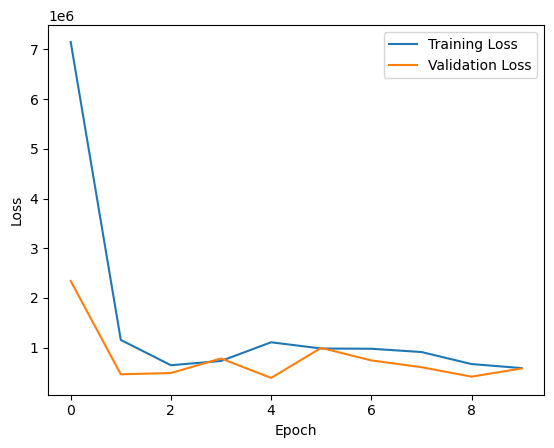

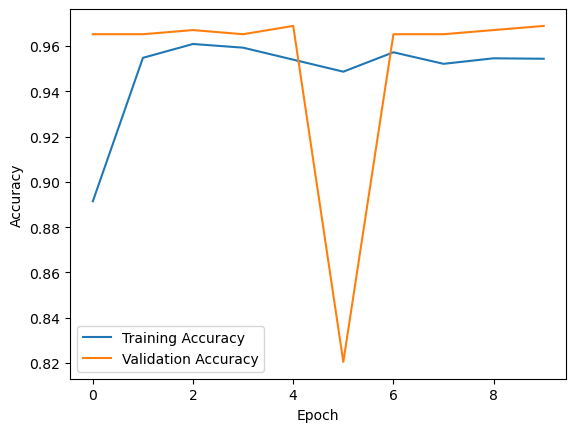

In [18]:


# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


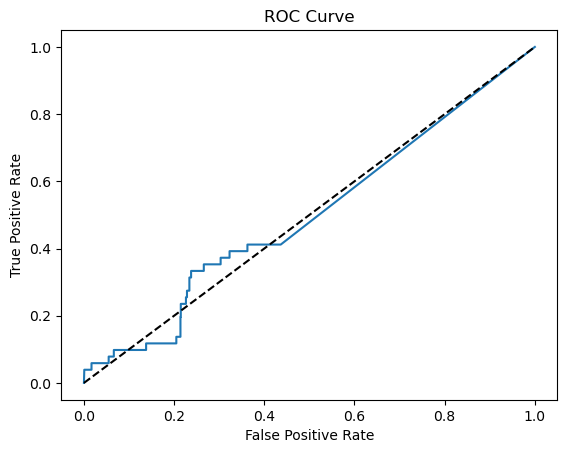

AUC: 0.4997


In [19]:
# Get predicted probabilities for the positive class
y_pred_prob = model.predict(X_test)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classification
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC: {auc:.4f}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step


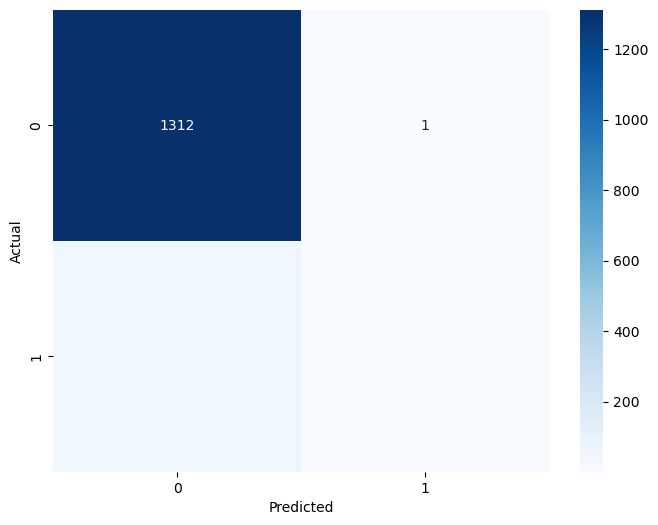

In [21]:
# Generate predictions for the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()